# Mid-Course Project

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [88]:
import pandas as pd
import numpy as np

In [393]:
import matplotlib.pyplot as plt

In [290]:
transactions = pd.read_csv("project_transactions.csv")

In [291]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [292]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [293]:
transactions.describe().round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3.404897e+10,390.0,2884715.0,101.0,3.0,3268.0,-1.0,56.0,-0.0,-0.0
std,605.0,4.723748e+09,190.0,3831949.0,1152.0,4.0,9122.0,1.0,27.0,0.0,0.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0,1.0,-130.0,1.0,-56.0,-8.0
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.0,330.0,-1.0,33.0,0.0,0.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.0,372.0,0.0,57.0,0.0,0.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.0,422.0,0.0,80.0,0.0,0.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0,34280.0,4.0,102.0,0.0,0.0


In [294]:
transactions.columns = [x.lower() for x in transactions.columns] #un-capitalize column names
# transactions = transactions.astype(
#     {
#         "household_key": "int16",
#         "day": "int16", #max day is 711 << 32.767 etc.
#         "product_id": "int32",
#         "quantity": "int32",
#         "sales_value": "float32",
#         "store_id": "int32",
#         "retail_disc": "float32",
#         "week_no": "int8",
#         "coupon_disc": "float32",
#         "coupon_match_disc": "float32"
#     }
# )
# Alternative way to downcast:
fcols = transactions.select_dtypes('float').columns
icols = transactions.select_dtypes('integer').columns

transactions[fcols] = transactions[fcols].apply(pd.to_numeric, downcast='float')
transactions[icols] = transactions[icols].apply(pd.to_numeric, downcast='integer')

print (transactions.dtypes)

household_key          int16
basket_id              int64
day                    int16
product_id             int32
quantity               int32
sales_value          float32
store_id               int32
retail_disc          float32
week_no                 int8
coupon_disc          float32
coupon_match_disc    float32
dtype: object


In [295]:
transactions.describe().round()

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,week_no,coupon_disc,coupon_match_disc
count,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3.404897e+10,390.0,2884715.0,101.0,3.0,3268.0,-1.0,56.0,-0.0,-0.0
std,605.0,4.723748e+09,190.0,3831949.0,1152.0,4.0,9122.0,1.0,27.0,0.0,0.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0,1.0,-130.0,1.0,-56.0,-8.0
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.0,330.0,-1.0,33.0,0.0,0.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.0,372.0,0.0,57.0,0.0,0.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.0,422.0,0.0,80.0,0.0,0.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0,34280.0,4.0,102.0,0.0,0.0


In [296]:
#Checking for size reduction: 180MB -> 84MB
#Checking for nulls: no null values in the Dataframe -> 2146311 full rows
transactions.info(show_counts=True, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   household_key      2146311 non-null  int16  
 1   basket_id          2146311 non-null  int64  
 2   day                2146311 non-null  int16  
 3   product_id         2146311 non-null  int32  
 4   quantity           2146311 non-null  int32  
 5   sales_value        2146311 non-null  float32
 6   store_id           2146311 non-null  int32  
 7   retail_disc        2146311 non-null  float32
 8   week_no            2146311 non-null  int8   
 9   coupon_disc        2146311 non-null  float32
 10  coupon_match_disc  2146311 non-null  float32
dtypes: float32(4), int16(2), int32(3), int64(1), int8(1)
memory usage: 83.9 MB


In [297]:
transactions["household_key"].nunique()

2099

In [298]:
transactions["product_id"].nunique()

84138

## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [304]:
transactions = (transactions
    .assign(
        total_disc = (transactions["retail_disc"] + transactions["coupon_disc"]),
        disc_perc = (lambda x: (x["total_disc"].abs() / x["sales_value"]))
    )
    .drop(["retail_disc", "coupon_disc", "coupon_match_disc"], axis=1)
)

transactions["disc_perc"] = (transactions["disc_perc"]
                                .where(transactions["disc_perc"] < 1, 1.0)
                                .where(transactions["disc_perc"] > 0, 0)
                            )

transactions.head(20)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,week_no,total_disc,disc_perc
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000
5,1130,26984905972,1,833715,2,0.34,31642,1,-0.32,0.941176
6,1130,26984905972,1,866950,2,0.34,31642,1,-0.32,0.941176
7,1130,26984905972,1,1022843,2,0.34,31642,1,-0.32,0.941176
8,1130,26984905972,1,1048462,1,1.19,31642,1,-0.80,0.672269
9,1130,26984905972,1,1071333,2,0.34,31642,1,-0.32,0.941176


## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 

In [323]:
total_sales = transactions.loc[:, "sales_value"].sum()
total_sales

6666244.5

In [327]:
total_discount_given = transactions.loc[:, "total_disc"].abs().sum()
total_discount_given

1178675.0

In [331]:
overall_disc_perc = ((total_discount_given / total_sales) * 100 ).round(2)
overall_disc_perc

17.68

In [387]:
transactions.loc[[transactions["quantity"].idxmax()], :] # the row that contains the max quantity

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,week_no,total_disc,disc_perc
1442095,630,34749153595,503,6534178,89638,250.0,384,73,-13.45,0.0538


In [417]:
discount_of_max_quantity_transaction = transactions.loc[transactions["quantity"].idxmax(), "disc_perc"]
discount_of_max_quantity_transaction

0.053799998

Text(-0.059179997816681866, 1117819.71, 'Discount: 0.05')

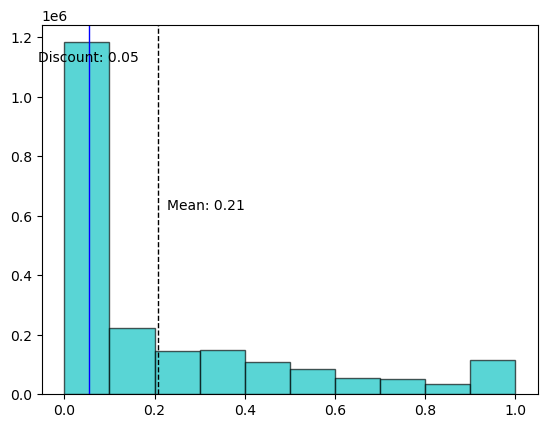

In [445]:

disc_perc_plot = plt.hist(transactions.disc_perc, color='c', edgecolor='k', alpha=0.65)
min_ylim, max_ylim = plt.ylim()

plt.axvline(transactions.disc_perc.mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(transactions.disc_perc.mean()*1.1, max_ylim * 0.5, 'Mean: {:.2f}'.format(transactions.disc_perc.mean()))

plt.axvline(discount_of_max_quantity_transaction, color='b', linestyle='solid', linewidth=1)
plt.text(discount_of_max_quantity_transaction * (-1.1), max_ylim * 0.9, 'Discount: {:.2f}'.format(discount_of_max_quantity_transaction))

#The row that brought the highest quality sold, has a below average discount percentage

In [438]:
#Average sales amount per basket
avg_sales_per_basket = total_sales / transactions["basket_id"].nunique()
avg_sales_per_basket.round(2)

28.62

In [391]:
#Average sales amount per household
avg_sales_per_house = total_sales / transactions["household_key"].nunique()
avg_sales_per_house.round(2)

3175.91

## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


In [449]:
sales_per_household = transactions.groupby("household_key").agg(household_sales = ('sales_value', 'sum'))
sales_per_household

,household_sales
household_key,
1,4330.160156
2,1954.339966
3,2653.209961
4,1200.109985
5,779.059998
...,...
2095,3790.489990
2096,1301.650024
2097,8823.830078


<Axes: xlabel='household_key'>

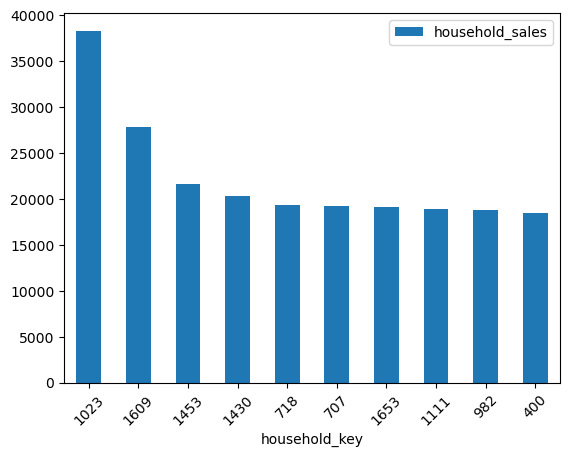

In [459]:
#Top 10 Household by Sales
sales_per_household.sort_values("household_sales" ,ascending=False).iloc[:10].plot.bar(rot=45)

## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.